In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import statsmodels.api as sm
import networkx as nx

$Y_i = a+b*X_i+e_i$

***Without Covariates***

(array([ 2.,  4., 13., 17., 18., 23., 18.,  3.,  1.,  1.]),
 array([-8.51277955, -6.45968934, -4.40659912, -2.35350891, -0.3004187 ,
         1.75267152,  3.80576173,  5.85885194,  7.91194216,  9.96503237,
        12.01812258]),
 <BarContainer object of 10 artists>)

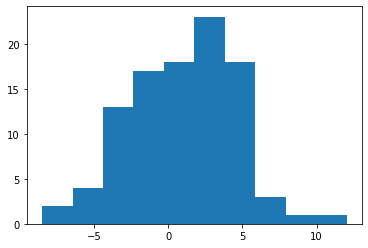

In [3]:
a = .5
b = 1.2
n = 100
slopes = []
for mc in range(100):
    # X is randomly assigned 0 or 1. True randomization
    X = np.random.uniform(0,1,n)
    e = np.random.normal(0,10,n)
    Y = a+b*X+e
    model = sm.OLS(Y,sm.add_constant(X))
    residuals = model.fit()
    slopes = slopes + [residuals.params[1]]
    
np.mean(slopes)
plt.hist(slopes)

DAG

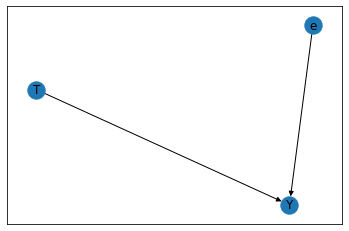

In [4]:
graph = nx.DiGraph()
graph.add_edges_from([("T", "Y"), ("e", "Y")])
plt.tight_layout()
nx.draw_networkx(graph, arrows=True)
plt.savefig("g1.png", format="PNG")

In [5]:
mod = sm.OLS(Y, sm.add_constant(X))
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8780
Date:                Mon, 11 Apr 2022   Prob (F-statistic):              0.351
Time:                        11:18:40   Log-Likelihood:                -370.80
No. Observations:                 100   AIC:                             745.6
Df Residuals:                      98   BIC:                             750.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1100      2.020     -1.539      0.1

DAG

In [6]:
slope_estimates = []
res.params[1]

3.2659310840850493

Monte Carlo 100

In [7]:
sum_of_bias=0
for mc_replication in range(100):
    X = np.random.randint(0,2,n)
    e = np.random.normal(0,1,n)
    Y = a+b*X+e
    mod = sm.OLS(Y, sm.add_constant(X))
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]]
    bias  = b - res.params[1]
    sum_of_bias= sum_of_bias+bias
meanbias= np.mean(sum_of_bias)
rsme =  np.sqrt(np.mean(sum_of_bias**2))
treatment_effect = sum(slope_estimates) / len(slope_estimates)
print("The RSME is", rsme,". The bias is", meanbias,". The treatment effect is", treatment_effect)

The RSME is 1.7207799336458527 . The bias is 1.7207799336458527 . The treatment effect is 1.1827922006635412


(array([ 4.,  6., 12., 14., 23., 25.,  9.,  5.,  1.,  1.]),
 array([0.62788961, 0.75228609, 0.87668256, 1.00107904, 1.12547551,
        1.24987198, 1.37426846, 1.49866493, 1.62306141, 1.74745788,
        1.87185435]),
 <BarContainer object of 10 artists>)

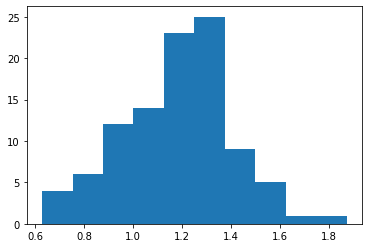

In [8]:
plt.hist(slope_estimates)

Monte Carlo 1000

In [9]:
sum_of_bias=0
for mc_replication in range(1000):
    X = np.random.randint(0,2,n)
    e = np.random.normal(0,1,n)
    Y = a+b*X+e
    mod = sm.OLS(Y, sm.add_constant(X))
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[1]]
    bias  = b - res.params[1]
    sum_of_bias= sum_of_bias+bias
meanbias= np.mean(sum_of_bias)
rsme =  np.sqrt(np.mean(sum_of_bias**2))
treatment_effect = sum(slope_estimates) / len(slope_estimates)
print("The RSME is", rsme,". The bias is", meanbias,". The treatment effect is", treatment_effect)

The RSME is 6.456953432972498 . The bias is 6.456953432972498 . The treatment effect is 1.1925656969394391


(array([ 16.,  39., 116., 204., 283., 241., 133.,  49.,  15.,   4.]),
 array([0.61418675, 0.73995351, 0.86572027, 0.99148703, 1.11725379,
        1.24302055, 1.36878731, 1.49455407, 1.62032083, 1.74608759,
        1.87185435]),
 <BarContainer object of 10 artists>)

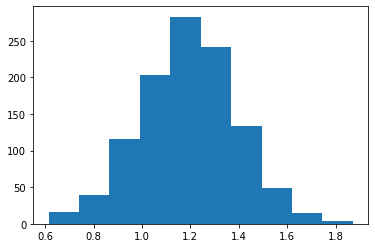

In [10]:
plt.hist(slope_estimates)

A real life situation is any scenario where treatment assignment is truly random. So, if an experiment is run and the treatment is assigned on a lottery system, there is no need to control or add covariates.

***With Covariates***

DAG

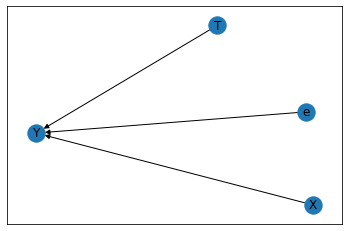

In [11]:
graph_cov = nx.DiGraph()
graph_cov.add_edges_from([("T", "Y"), ("e", "Y"), ("X", "Y")])
plt.tight_layout()
nx.draw_networkx(graph_cov, arrows=True)
plt.savefig("g1.png", format="PNG")

Monte Carlo 100

In [15]:
slope_estimates = []
res.params[1]
a = .5
b = 1.2
n = 100
corr=.5
for mc_replication in range(1000):
    T = np.random.randint(0,2,n)
    X = np.random.randint(0,10,n)
    e = np.random.normal(0,1,n)
    # now there is a covariate that also impacts Y that we control for
    Y = a+b*T+corr*X+e
    # because of covariate we add X to the dataframe for regression
    data = pd.DataFrame({'T':T, 'X':X})
    mod = sm.OLS(Y, sm.add_constant(data))
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[0]]
    bias  = b - res.params[1]
    sum_of_bias= sum_of_bias+bias
meanbias= np.mean(sum_of_bias)
rsme =  np.sqrt(np.mean(sum_of_bias**2))
treatment_effect = sum(slope_estimates) / len(slope_estimates)
print("The RSME is", rsme,". The bias is", meanbias,". The treatment effect is", treatment_effect)

/Users/polly/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The RSME is 1410.8692878510474 . The bias is 1410.8692878510474 . The treatment effect is 0.5077098732158065


Monte Carlo 1000

In [16]:
slope_estimates = []
res.params[1]
a = .5
b = 1.2
n = 100
corr=.5
for mc_replication in range(1000):
    T = np.random.randint(0,2,n)
    X = np.random.randint(0,10,n)
    e = np.random.normal(0,1,n)
    Y = a+b*T+corr*X+e
    data = pd.DataFrame({'T':T, 'X':X})
    mod = sm.OLS(Y, sm.add_constant(data))
    res = mod.fit()
    slope_estimates = slope_estimates + [res.params[0]]
    bias  = b - res.params[1]
    sum_of_bias= sum_of_bias+bias
meanbias= np.mean(sum_of_bias)
rsme =  np.sqrt(np.mean(sum_of_bias**2))
treatment_effect = sum(slope_estimates) / len(slope_estimates)
print("The RSME is", rsme,". The bias is", meanbias,". The treatment effect is", treatment_effect)

The RSME is 1404.8827865877545 . The bias is 1404.8827865877545 . The treatment effect is 0.4895510311707833


(array([  1.,   7.,  32.,  76., 206., 236., 240., 143.,  50.,   9.]),
 array([0.2609522 , 0.40652323, 0.55209425, 0.69766528, 0.8432363 ,
        0.98880733, 1.13437835, 1.27994937, 1.4255204 , 1.57109142,
        1.71666245]),
 <BarContainer object of 10 artists>)

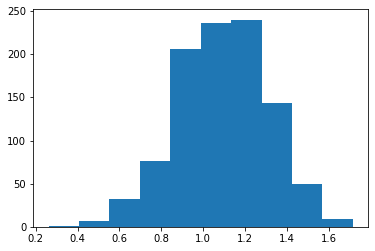

In [14]:
plt.hist(slope_estimates)

REAL LIFE EXAMPLE

A random experiment is run to test if a medication is effective. A random portion of the population is chosen via lottery and treatment is randomized based on that lottery. In the case of no covariates, a regression is run on the health outcome and if the participant recieved treatment (t=1) or a placebo. In the case of covariates, the same regression is run, but now they add other descriptive factors about the patients, such as sex, age, weight, etc.